In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
files = [f for f in os.listdir(r"C:\Users\malic\Desktop\pandas\3.projekt\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

In [3]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
filepaths = []

for f in files:
    filepath = r"C:\Users\malic\Desktop\pandas\3.projekt\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"+"\\"+f
    filepaths.append(filepath)
df = pd.concat(map(pd.read_csv, filepaths))

In [5]:
df.to_csv('df')

# What was the best mont for sales, how much was earned that month?

In [6]:
df = df.dropna(how = 'all').reset_index()

In [7]:

def get_month(Date):
    return Date. split('/')[0]
df['Month']=df['Order Date'].apply(lambda x:get_month(x))

In [8]:
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
df=df.loc[df['Quantity Ordered'].str.contains('Quantity')== False].reset_index()

In [10]:
df['Total Earnings'] = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float)

In [11]:
df_monthly_sales = df[['Month', 'Total Earnings']].groupby('Month').sum().reset_index()

In [12]:
df_monthly_sales

,Month,Total Earnings
0,01,1822256.73
1,02,2202022.42
2,03,2807100.38
3,04,3390670.24
4,05,3152606.75
5,06,2577802.26
6,07,2647775.76
7,08,2244467.88
8,09,2097560.13
9,10,3736726.88


In [13]:
print(df_monthly_sales.nlargest(1, 'Total Earnings'))

   Month  Total Earnings
11    12      4613443.34


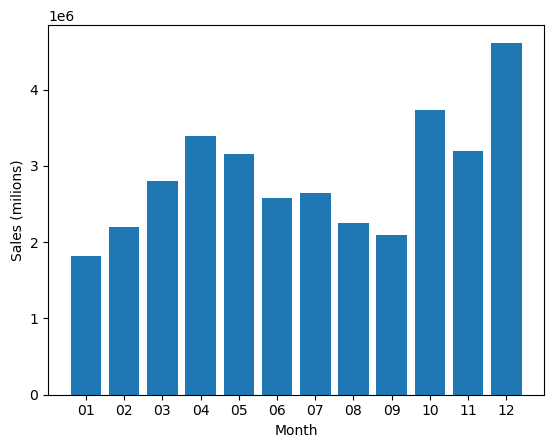

In [38]:
plt.bar(df_monthly_sales.Month, df_monthly_sales['Total Earnings'])
plt.xlabel("Month")
plt.ylabel("Sales (milions)")
plt.show()

# What city had the highest number of sales?

In [14]:
def get_city(address):
    return address.split(',')[1]
df['City'] = df['Purchase Address'].apply(lambda x: get_city(x))
def get_state0(address):
    return address.split(',')[2]
df['State0'] = df['Purchase Address'].apply(lambda x: get_state0(x))
def get_state(address):
    return address.split(' ')[1]
df['State'] = df['State0'].apply(lambda x: get_state(x))
df['City + State'] = df['City'] + ' ' + df['State']
df = df.drop(columns = ['State0', 'City', 'State'])

In [15]:
df_city_sales = df[['City + State', 'Total Earnings']].groupby('City + State').sum()

In [58]:
df_city_sales

,Total Earnings,Total Earnings int
City + State,,
Atlanta GA,2795498.58,2795498
Austin TX,1819581.75,1819581
Boston MA,3661642.01,3661642
Dallas TX,2767975.40,2767975
Los Angeles CA,5452570.80,5452570
New York City NY,4664317.43,4664317
Portland ME,449758.27,449758
Portland OR,1870732.34,1870732
San Francisco CA,8262203.91,8262203


In [54]:
print(df_city_sales.nlargest(1, 'Total Earnings'))

                   Total Earnings  Total Earnings int
City + State                                         
 San Francisco CA      8262203.91             8262203


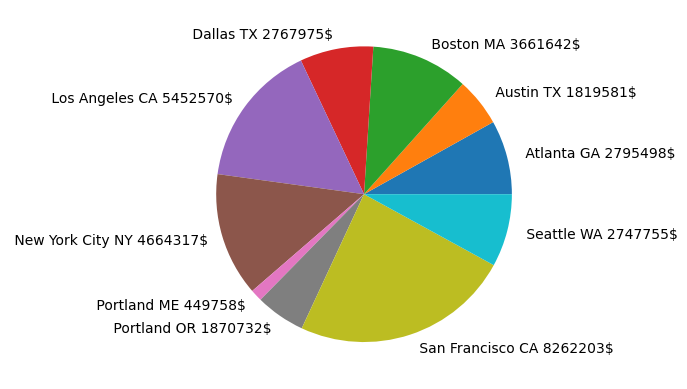

In [69]:
Total_Earnings = df_city_sales['Total Earnings'].astype(int)
labels = Total_Earnings.keys()+" "+Total_Earnings.astype(str)+'$'
plt.pie(Total_Earnings, labels = labels)


#lt.explode(3)
#plt.legend()
plt.show()


# What time should we display advertisements?


In [18]:
df['Order Date']

0         04/19/19 08:46
1         04/07/19 22:30
2         04/12/19 14:38
3         04/12/19 14:38
4         04/30/19 09:27
               ...      
185945    09/17/19 20:56
185946    09/01/19 16:00
185947    09/23/19 07:39
185948    09/19/19 17:30
185949    09/30/19 00:18
Name: Order Date, Length: 185950, dtype: object

In [19]:
def get_time(time):
    return time.split(' ')[1]
df['Time of purchase'] = df['Order Date'].apply(lambda x: get_time(x))
def get_hour(time):
    return time.split(':')[0]
df['Hour Of Purchase'] = df['Time of purchase'].apply(lambda x: get_hour(x))
df = df.drop(columns = 'Time of purchase')


In [20]:
df_sales_in_time = df[['Total Earnings', 'Hour Of Purchase']].groupby('Hour Of Purchase').sum()

In [21]:
print(df_sales_in_time.sort_values('Total Earnings', ascending=False))

                  Total Earnings
Hour Of Purchase                
19                    2412938.54
12                    2316821.34
11                    2300610.24
20                    2281716.24
18                    2219348.30
13                    2155389.80
17                    2129361.61
14                    2083672.73
21                    2042000.86
10                    1944286.77
15                    1941549.60
16                    1904601.31
09                    1639030.58
22                    1607549.21
08                    1192348.97
23                    1179304.44
07                     744854.12
00                     713721.27
01                     460866.88
06                     448113.00
02                     234851.44
05                     230679.82
04                     162661.01
03                     145757.89


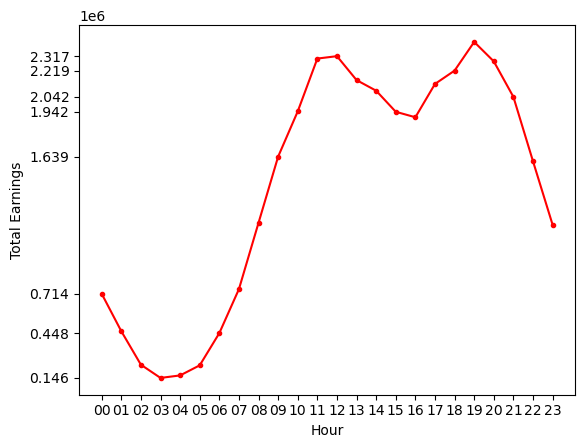

In [96]:
Hours = df_sales_in_time.index
plt.plot(Hours, df_sales_in_time['Total Earnings'], 'r.-')
plt.xlabel('Hour')
plt.ylabel('Total Earnings')
plt.yticks(df_sales_in_time['Total Earnings'][0:24:3])
plt.show()

### Answer: People are most likely to buy products around 7 pm, so we should target them with advertisements right before that time. Significant amount of products are also sold around noon, so that is another important time for us to push advertising as much as possible.

### different approach:

In [22]:
df1 = df.copy(deep=True)

In [23]:
df1 = df1.drop(columns = 'Hour Of Purchase')

In [24]:
df1['Order Date'] = pd.to_datetime(df['Order Date'])

In [25]:
df1['Hour'] = df1['Order Date'].dt.hour

In [26]:
df1_sales_in_time = df1[['Hour', 'Total Earnings']].groupby('Hour').sum()

In [27]:
print(df1_sales_in_time.sort_values('Total Earnings', ascending = False))

      Total Earnings
Hour                
19        2412938.54
12        2316821.34
11        2300610.24
20        2281716.24
18        2219348.30
13        2155389.80
17        2129361.61
14        2083672.73
21        2042000.86
10        1944286.77
15        1941549.60
16        1904601.31
9         1639030.58
22        1607549.21
8         1192348.97
23        1179304.44
7          744854.12
0          713721.27
1          460866.88
6          448113.00
2          234851.44
5          230679.82
4          162661.01
3          145757.89


### Answer: People are most likely to buy products around 7 pm, so we should target them with advertisements right before that time. Significant amount of products are also sold around noon, so that is another important time for us to push advertising as much as possible

# What product sold the most?

In [28]:
df = df.reset_index(drop=True)

In [29]:
df = df.drop(columns = 'level_0')

In [30]:
df = df.drop(columns = 'index')

In [31]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [32]:
df_product_sales = df[['Product', 'Quantity Ordered']].groupby('Product').sum()

In [34]:
print(df_product_sales.sort_values(by = 'Quantity Ordered', ascending = False).nlargest(1, 'Quantity Ordered'))

                        Quantity Ordered
Product                                 
AAA Batteries (4-pack)             31017


In [137]:
df['Product'].drop_duplicates().shape
df_product_sales = df_product_sales.reset_index()
df_product_sales['Product']

0                   20in Monitor
1         27in 4K Gaming Monitor
2               27in FHD Monitor
3         34in Ultrawide Monitor
4          AA Batteries (4-pack)
5         AAA Batteries (4-pack)
6       Apple Airpods Headphones
7     Bose SoundSport Headphones
8                  Flatscreen TV
9                   Google Phone
10                      LG Dryer
11            LG Washing Machine
12      Lightning Charging Cable
13            Macbook Pro Laptop
14               ThinkPad Laptop
15          USB-C Charging Cable
16               Vareebadd Phone
17              Wired Headphones
18                        iPhone
Name: Product, dtype: object

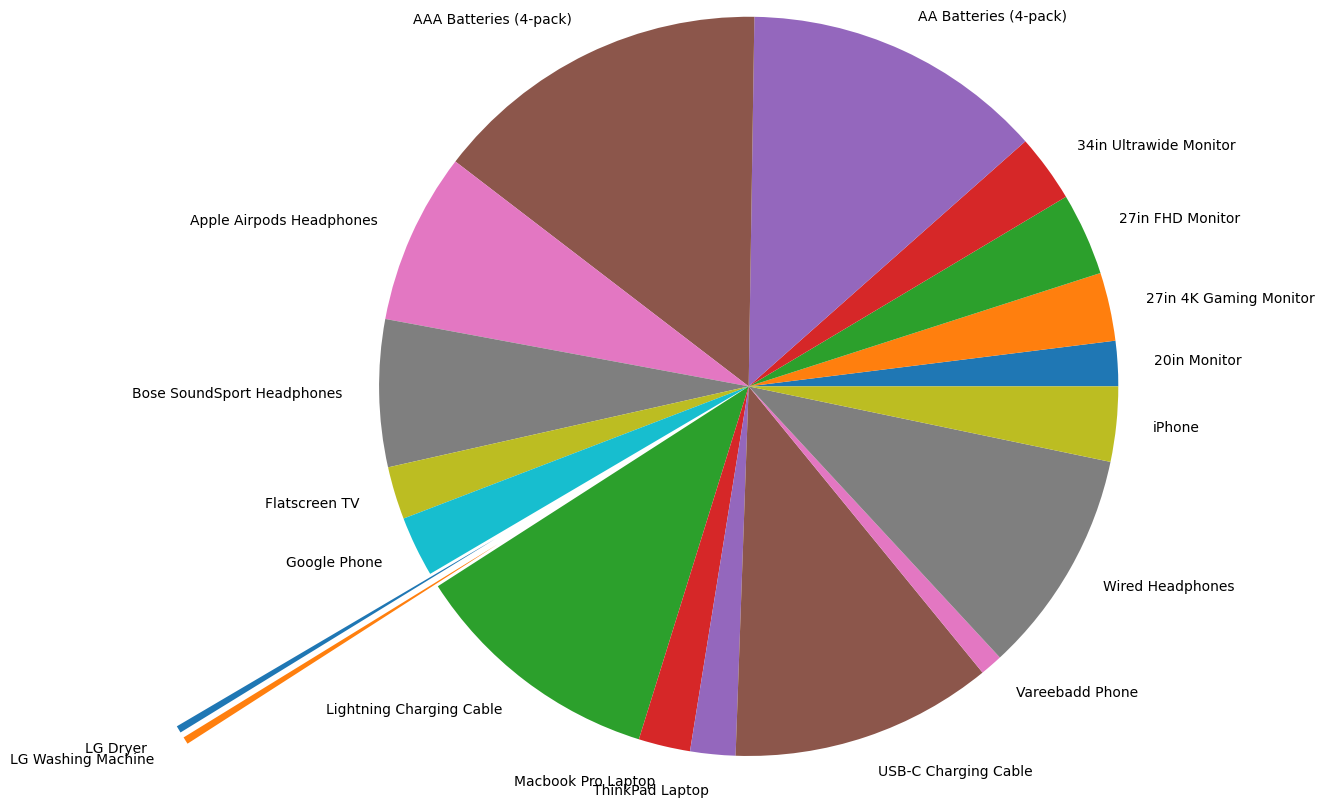

In [138]:
quantity = df_product_sales['Quantity Ordered']
labels = df_product_sales['Product']
myexplode = [0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0] 
plt.pie(quantity, radius = 2.5, explode = myexplode, labels = labels)

plt.show()